### Classification Revision 
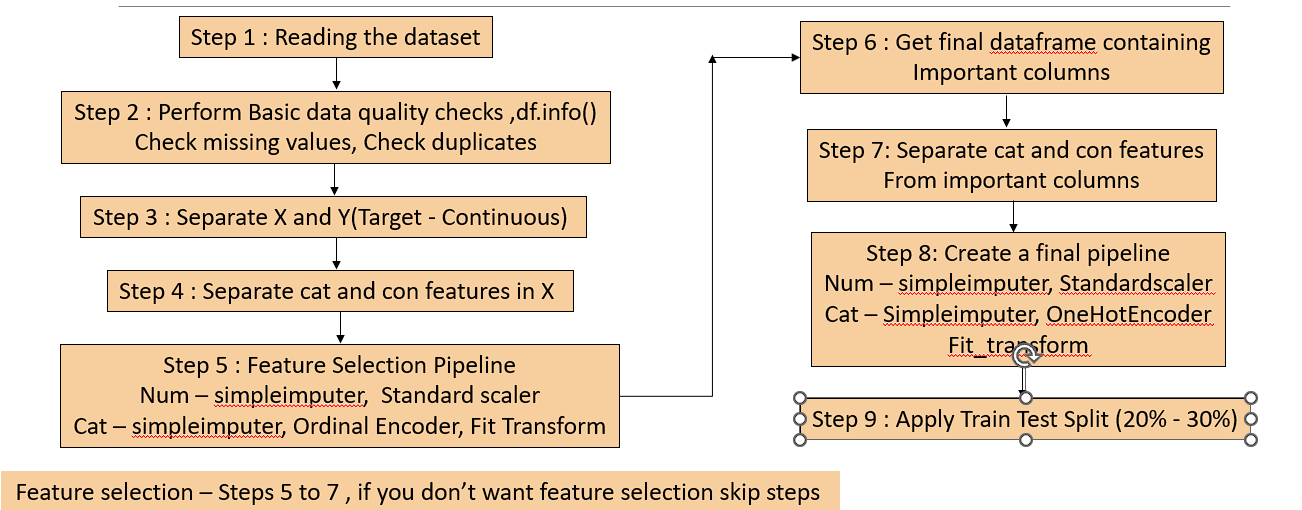
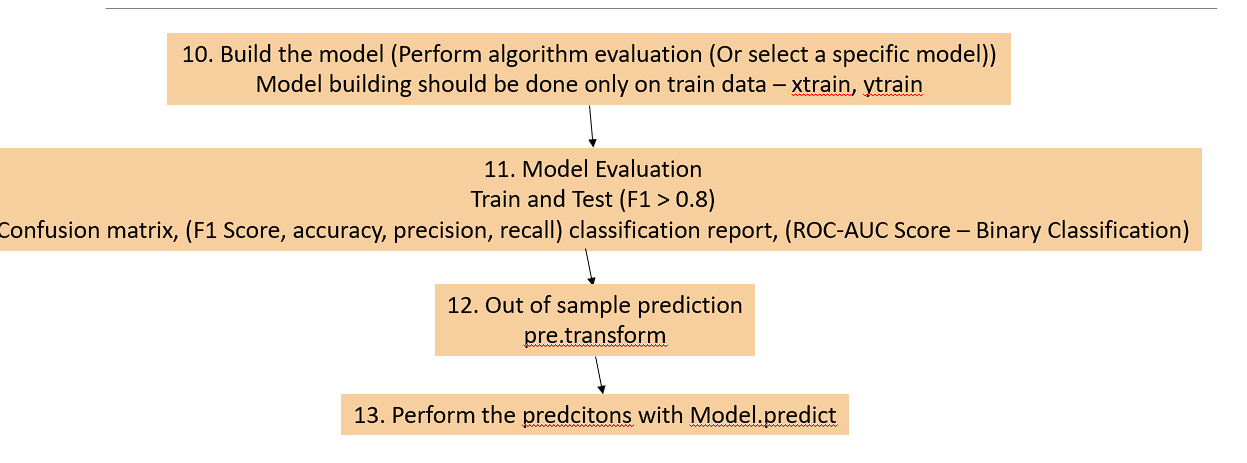

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
X=df.drop(columns=['id','CustomerId','Surname','Exited'])
Y=df[['Exited']]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [7]:
Y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [8]:
Y.value_counts()

Exited
0         130113
1          34921
Name: count, dtype: int64

<Axes: xlabel='Exited'>

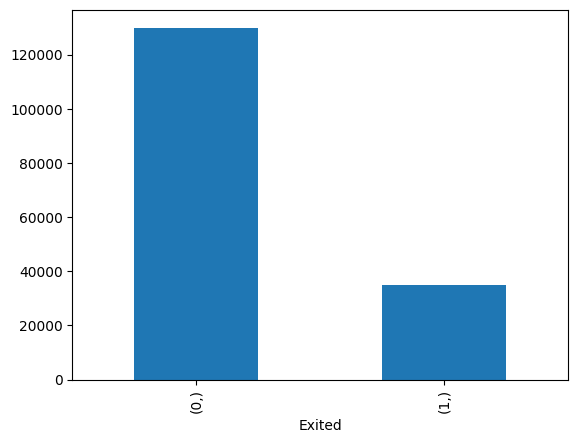

In [9]:
Y.value_counts().plot(kind='bar')

In [10]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [11]:
cat

['Geography', 'Gender']

In [12]:
con

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='median')),
                          ('scalar',StandardScaler())]))

In [15]:
cat_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='most_frequent')),
                          ('ordinal',OrdinalEncoder())]))

In [16]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Geography', 'Gender'])])

In [18]:
X_pre=pre.fit_transform(X)
X_pre.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,2.0,1.0


In [19]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_pre,Y)
mi

array([0.00271104, 0.08388129, 0.00152378, 0.02113951, 0.10116754,
       0.01241051, 0.03647964, 0.00808631, 0.02580723, 0.033335  ])

In [20]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi

num__CreditScore        0.002711
num__Age                0.083881
num__Tenure             0.001524
num__Balance            0.021140
num__NumOfProducts      0.101168
num__HasCrCard          0.012411
num__IsActiveMember     0.036480
num__EstimatedSalary    0.008086
cat__Geography          0.025807
cat__Gender             0.033335
dtype: float64

In [21]:
mi=mi.sort_values(ascending=False)
mi

num__NumOfProducts      0.101168
num__Age                0.083881
num__IsActiveMember     0.036480
cat__Gender             0.033335
cat__Geography          0.025807
num__Balance            0.021140
num__HasCrCard          0.012411
num__EstimatedSalary    0.008086
num__CreditScore        0.002711
num__Tenure             0.001524
dtype: float64

<Axes: title={'center': 'Mutual information Score'}>

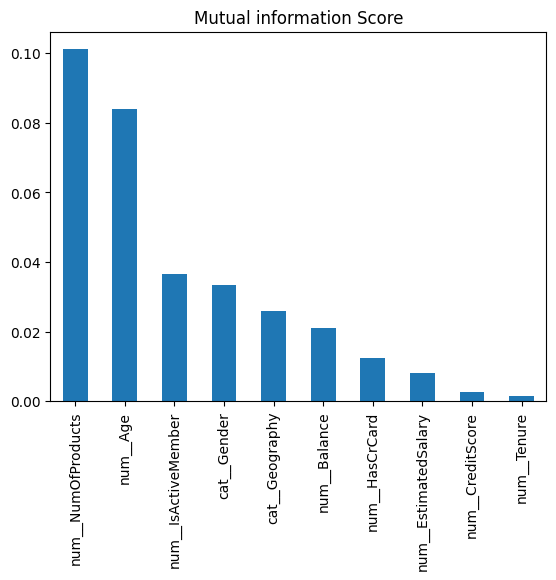

In [22]:
mi.plot(kind='bar',title='Mutual information Score')

In [23]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(mutual_info_classif,k=7)
sel.fit(X_pre,Y)
sel_col=sel.get_feature_names_out()
sel_col

array(['num__Age', 'num__Balance', 'num__NumOfProducts', 'num__HasCrCard',
       'num__IsActiveMember', 'cat__Geography', 'cat__Gender'],
      dtype=object)

In [24]:
sel_col[0].split('__')[1]

'Age'

In [25]:
imp_sel=[]
for i in sel_col:
    s=i.split('__')[1]
    imp_sel.append(s)    

In [26]:
imp_sel

['Age',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Geography',
 'Gender']

In [27]:
X_sel=X[imp_sel]
X_sel.head()

,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography,Gender
0,33.0,0.00,2,1.0,0.0,France,Male
1,33.0,0.00,2,1.0,1.0,France,Male
2,40.0,0.00,2,1.0,0.0,France,Male
3,34.0,148882.54,1,1.0,1.0,France,Male
4,33.0,0.00,2,1.0,1.0,Spain,Male


In [28]:
cat_sel=list(X_sel.columns[X_sel.dtypes=='object'])
con_sel=list(X_sel.columns[X_sel.dtypes!='object'])

In [29]:
cat_sel

['Geography', 'Gender']

In [30]:
con_sel

['Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [33]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [34]:
pre1 = ColumnTransformer([('num', num_pipe1, con_sel),
                          ('cat', cat_pipe1, cat_sel)]).set_output(transform='pandas')

In [35]:
X_sel_pre = pre1.fit_transform(X_sel)
X_sel_pre.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-0.578074,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
1,-0.578074,-0.883163,0.814298,0.571263,1.00447,1.0,0.0,0.0,0.0,1.0
2,0.211354,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
3,-0.465299,1.486918,-1.013348,0.571263,1.00447,1.0,0.0,0.0,0.0,1.0
4,-0.578074,-0.883163,0.814298,0.571263,1.00447,0.0,0.0,1.0,0.0,1.0


In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X_sel_pre,Y,test_size=0.33,random_state=42)

In [37]:
xtrain.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
146416,0.324129,-0.883163,0.814298,0.571263,-0.99555,0.0,0.0,1.0,1.0,0.0
82193,-0.352523,-0.883163,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
66485,1.790210,0.020974,-1.013348,-1.750507,-0.99555,0.0,0.0,1.0,1.0,0.0
136542,-0.465299,-0.883163,0.814298,0.571263,1.00447,1.0,0.0,0.0,1.0,0.0
36459,-0.352523,0.911117,-1.013348,0.571263,1.00447,1.0,0.0,0.0,0.0,1.0


In [38]:
ytrain.head()

,Exited
146416,0
82193,0
66485,1
136542,0
36459,0


In [39]:
xtest.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
33042,-0.803625,0.741797,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0
36330,-1.367503,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
59446,0.098578,0.950137,2.641943,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
92278,1.902986,0.235376,-1.013348,-1.750507,-0.99555,0.0,0.0,1.0,0.0,1.0
146750,-0.803625,0.813758,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0


In [40]:
ytest.head()

,Exited
33042,0
36330,0
59446,1
92278,0
146750,0


In [41]:
xtrain.shape

(110572, 10)

In [42]:
xtest.shape

(54462, 10)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [44]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Gradient Boost' : GradientBoostingClassifier(),
       'Random Forest' : RandomForestClassifier()}

In [45]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('Random Forest', RandomForestClassifier())])

In [46]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    f1_tr=f1_score(ytrain,ypred_tr,average='macro')
    f1_ts=f1_score(ytest,ypred_ts,average='macro')
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    print(f'Model Name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print(f'Cross validation score : {f1_cv:.4f}')
    print('\n====================================================\n')

Model Name : Logistic

Train F1 : 0.6988
Test F1 : 0.6945
Cross validation score : 0.6989


Model Name : Decision Tree

Train F1 : 0.9163
Test F1 : 0.7292
Cross validation score : 0.7292


Model Name : Gradient Boost

Train F1 : 0.7751
Test F1 : 0.7725
Cross validation score : 0.7740


Model Name : Random Forest

Train F1 : 0.9169
Test F1 : 0.7453
Cross validation score : 0.7466




### Selecting Gradient boosting algorithm as it has higest cross val score of 0.7725

### Hyperparameter tuning

In [47]:
params = {'learning_rate' : [0.001,0.01,0.1,0.2],
          'n_estimators' : [10,100,200,300],
          'max_depth' : [2,3,4,5]}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv=RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [10, 100, 200, 300]},
                   scoring='f1')

In [50]:
rscv.best_score_

0.6366711495507429

In [51]:
rscv.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [53]:
best_gbc=rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=5, n_estimators=200)

### Model Evalution

## Accuracy

In [54]:
best_gbc.score(xtrain,ytrain)

0.8702383967007923

In [56]:
best_gbc.score(xtest,ytest)

0.8641621681172194

### F1 Scores Macro

In [57]:
ypred_tr1 = best_gbc.predict(xtrain)
ypred_ts1 = best_gbc.predict(xtest)

In [58]:
f1_score(ytrain, ypred_tr1, average='macro')

0.7862297715471627

In [59]:
f1_score(ytest, ypred_ts1, average='macro')

0.7751041018097362

In [60]:
cross_val_score(best_gbc, xtrain, ytrain, cv=5, scoring='f1_macro')

array([0.77621752, 0.77529111, 0.77674555, 0.77778922, 0.77722263])

### Plot confusion matrix for best_gbc

In [61]:
best_gbc.classes_

array([0, 1], dtype=int64)

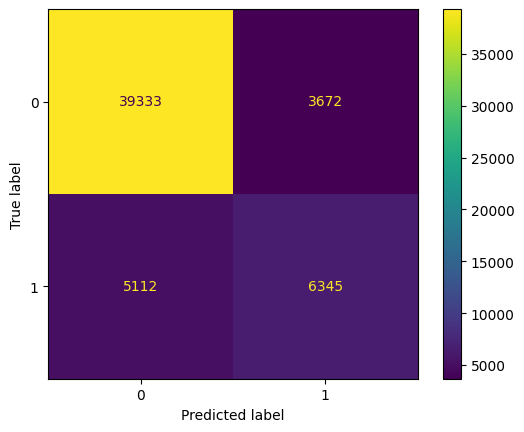

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()


### Classification Report

In [63]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     43005
           1       0.63      0.55      0.59     11457

    accuracy                           0.84     54462
   macro avg       0.76      0.73      0.75     54462
weighted avg       0.83      0.84      0.83     54462



### Plot the roc auc curve


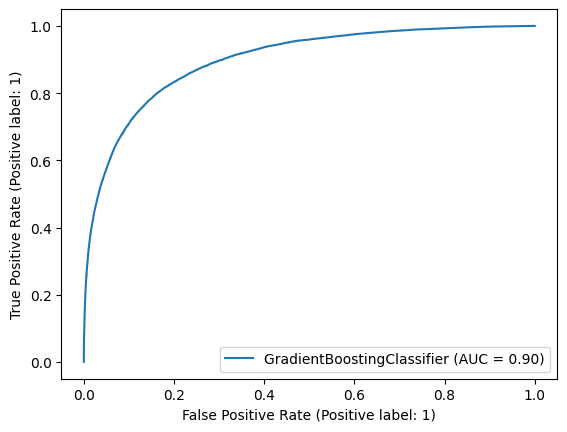

In [64]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc, xtrain, ytrain)

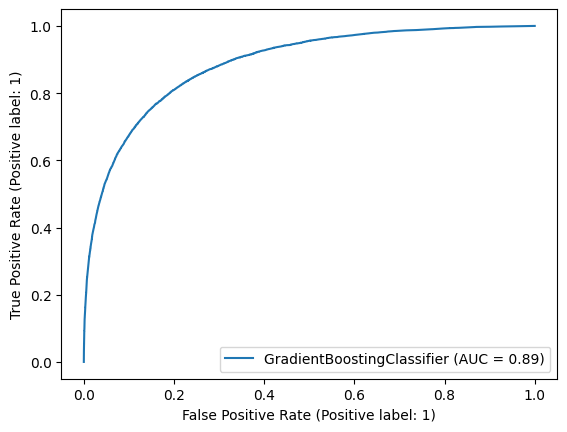

In [65]:
RocCurveDisplay.from_estimator(best_gbc, xtest, ytest)

In [66]:
scores = cross_val_score(best_gbc, xtrain, ytrain, cv=5, scoring='roc_auc')
scores

array([0.88686117, 0.88689057, 0.89028349, 0.88580055, 0.89025976])

In [67]:
scores.mean()

0.888019106389019

### Out of sample prediction

In [68]:
xnew = pd.read_csv('test.csv')
xnew.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [70]:
xnew_pre = pre1.transform(xnew)
xnew_pre.head()

,num__Age,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-1.705829,-0.883163,0.814298,-1.750507,1.00447,1.0,0.0,0.0,1.0,0.0
1,0.888007,-0.883163,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0
2,-0.465299,-0.883163,0.814298,0.571263,-0.99555,1.0,0.0,0.0,1.0,0.0
3,-0.239748,-0.883163,-1.013348,0.571263,-0.99555,1.0,0.0,0.0,0.0,1.0
4,-0.014197,1.047249,-1.013348,0.571263,-0.99555,0.0,1.0,0.0,0.0,1.0


In [71]:
preds = best_gbc.predict(xnew_pre)
preds[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [74]:
probs = best_gbc.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.02279907, 0.84332891, 0.02676814, 0.28362329, 0.39212862])

### Save above results in dataframe

In [72]:
df_final = xnew[['id']]
df_final

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [76]:
df_final['Exited_pred'] = preds
df_final['Prob'] = probs

In [77]:
df_final.head()

,id,Exited_pred,Prob
0,165034,0,0.022799
1,165035,1,0.843329
2,165036,0,0.026768
3,165037,0,0.283623
4,165038,0,0.392129


In [78]:
df_final['Exited_pred'].value_counts()

Exited_pred
0    92420
1    17603
Name: count, dtype: int64

<Axes: xlabel='Exited_pred'>

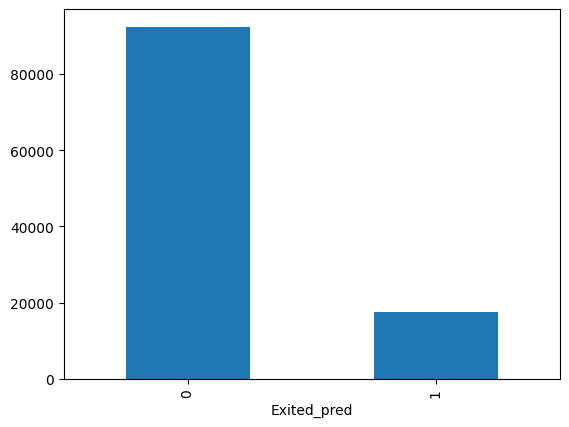

In [79]:
df_final['Exited_pred'].value_counts().plot(kind='bar')
